## Gibbs sampling

Gibbs sampling은 두 개 이상의 확률 변수의 결합 확률 분포로부터 일련의 표본을 생성하는 확률적 알고리즘으로, 결합 확률 분포나 그에 관련된 확률 계산을 근사하기 위해 사용된다.

Gibbs sampling은 Metropolis-hasting 알고리즘의 한 예이고, 따라서 MCMC 알고리즘의 한 예이다. 

### 알고리즘

$n$개의 확률 변수 $(X_1,...X_n)$의 결합 확률 분포 $p(x_1,...,x_n)$로 부터 $k$개의 표본 $X$를 얻으려고 할 때, 깁스 샘플링은 다음과 같이 동작한다.

1. 임의의 $X^{(0)}=(x_1^{(0)},...,x_n^{(0)})$을 선택한다.
2. 각 변수 $x_1, ... , x_n$에 대하여, 현재의 값을 기반으로 한 새로운 값을 조건부 확률 분포 $p(x_i^{(t)}|x_1^{(t)},...,x_{i-1}^{(t)},x_{i_1}^{(t-1)},...,x_n^{(t-1)})$에서 표집한다.
3. $X^{(t)}=(x_1^{(t)},...,x_n^{(t)})$를 $X$에 추가한다.

실제 사용 시에는 처음 수집되는 표본을 사용하지 않고 버리게 된다. 이것은 깁스 샘플링에서 수집되는 표본은 서로 독립적이지 않고 마르코프 연쇄(Markov chain)에 속하기 때문인데, 표본의 앞 부분은 초기 상태 $X^{(0)}$에 크게 의존하지만 충분히 많은 시행이 지난 후에는 초기 상태에 관계 없이 $p$에 기반한 표본을 수집할 수 있다.

### 수학적 배경

깁스 표집에서 주어진 표본 $x$에 대하여, $i$번째 변수를 변경하여 다음 표집 $y$을 수집할 확률은 다음과 같다.

$$\text{Pr}(x|y)=\begin{cases}{p(y)\over{\sum_{z\in\Theta:z\sim_ix}p(z)}} \:\: x\sim_iy\\0\:\:\text{otherwise}\end{cases}$$

여기에서 $\Theta$는 모든 가능한 표본의 집합을 의미하며, $x\sim_iy$는 $x$와 $y$가 $i$번 째를 제외한 모든 값이 같다는 것을 의미한다. 이 때 다음의 성질이 성립한다.

$$p(x)\text{Pr}(y|x)=p(y)\text{Pr}(x|y)$$

이러한 성질은 변수를 하나만 변경하는 것이 아니라 각 변수를 차례대로 변경하여 $x^{(t-1)}$에서 $x^{(t)}$를 얻을 때에도 동일하게 보존된다.

이 때 $\Theta$와 위의 표집 확률을 기반으로 하는 Markov Chain을 구성하면, 이 마르코프 연쇄는 가역적이다.가역적 성질은 정상(stationary)성질을 포함하는데, 이것은 표본을 연속적으로 수집할 때 표본의 수집 확률은 초기 표본에 관계 없이 $p$에 수렴한다는 것을 의미한다.

### Gibbs Sampling

Gibbs Sampling은 MCMC방법으로, potentially really really complicated한 고차원의 샘플하기 어려운 분포로부터 샘플하는 방법이다. 

이유는 분포의 normalizing constant를 계산할 때, 아주 복잡한 integral이 포함돼 있기 때문이다. Gibbs Samplers는 joint distribution의 conditional distribution이 모두 제공되었을 때 샘플을 추출할 수 있다.

In [9]:
import numpy as np
import seaborn as sns


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iter=10000):
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples


복잡한 부분은 conditional distribution을 유도하는 것이다. 위에서 `p_x_given_y`와 `p_y_given_x`는 Bivariate Normal의 conditional distribution이고 Univariate Gaussian으로 한다. 

그리고나서 다음은 간단하다. 이 두 conditional을 sampler에서 반복적으로 모든 conditional distribution에서 샘플함으로써 합치는 것이다. 각각의 반복에서 Gibbs sampler는 각 conditional distribution에서 차례로 샘플을 뽑는다. 그리고 새로운 값을 다른 conditional distribution에서 뽑아낸다.

반복이 많아질수록, 우리가 원하는 분포에서의 샘플과 같게 샘플이 이뤄질 것이다

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


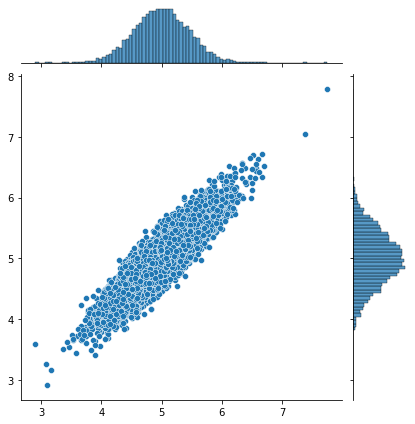

In [11]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

samples = gibbs_sampling(mus, sigmas)
sns.jointplot(samples[:, 0], samples[:, 1])